이병민

### 코로나19 분석

데이터 :  patientInfo.csv - kaggle(https://www.kaggle.com/kimjihoo/coronavirusdataset)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings; warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [ ]:
# 데이터 읽기
from google.colab import files
patient = 'patient.csv'

Saving Covid-19_korea.csv to Covid-19_korea.csv


In [ ]:
# 구글 드라이브에서 데이터 읽기
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 데이터 불러 오기
patient = pd.read_csv('/content/drive/My Drive/PatientInfo.csv')

In [ ]:
# 출력
print(patient.shape)
patient.head()

(5165, 14)


,patient_id,sex,age,country,province,city,infection_case,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,male,50s,Korea,Seoul,Gangseo-gu,overseas inflow,NaN,75,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,male,30s,Korea,Seoul,Jungnang-gu,overseas inflow,NaN,31,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,male,50s,Korea,Seoul,Jongno-gu,contact with patient,2002000001,17,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,male,20s,Korea,Seoul,Mapo-gu,overseas inflow,NaN,9,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,female,20s,Korea,Seoul,Seongbuk-gu,contact with patient,1000000002,2,NaN,2020-01-31,2020-02-24,NaN,released


In [ ]:
# 컬럼 확인 
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5165 entries, 0 to 5164
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          5165 non-null   int64 
 1   sex                 4043 non-null   object
 2   age                 3785 non-null   object
 3   country             5165 non-null   object
 4   province            5165 non-null   object
 5   city                5071 non-null   object
 6   infection_case      4246 non-null   object
 7   infected_by         1346 non-null   object
 8   contact_number      791 non-null    object
 9   symptom_onset_date  690 non-null    object
 10  confirmed_date      5162 non-null   object
 11  released_date       1587 non-null   object
 12  deceased_date       66 non-null     object
 13  state               5165 non-null   object
dtypes: int64(1), object(13)
memory usage: 565.0+ KB



 1   sex                성별

 2   age                나이대

 3   country            국적

 4   province           지방 

 5   city               환자의 도시 

 6   infection_case     감염 사례 

 7   infected_by        감염시킨 사람의 ID 

 8   contact_number     사람들과의 접촉 수 

 9   symptom_onset_date 증상 발병 날짜 

 10  confirmed_date     확정일

 11  released_date      감염일

 12  deceased_date      사망 한 날짜
 
 13  state              상태

Text(0.5, 1.0, '확진자 수')

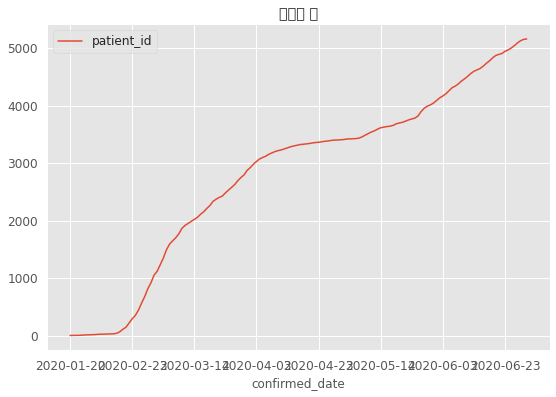

In [ ]:
plt.rc('font', family='Malgun Gothic')
confirm.cumsum().plot(figsize=(9,6))
plt.title('확진자 수')

In [ ]:
from fbprophet import Prophet
fb_data = confirm_cumsum.reset_index()
fb_data.columns = ['ds','y']
fb_data

,ds,y
0,2020-01-20,1
1,2020-01-23,2
2,2020-01-26,3
3,2020-01-27,4
4,2020-01-30,8
...,...,...
143,2020-06-26,5044
144,2020-06-27,5092
145,2020-06-28,5130
146,2020-06-29,5155


In [ ]:
prophet = Prophet(growth='linear',
                  seasonality_mode='multiplicative',
                  changepoint_range=0.8, # 데이터의 90% 정도에서 changepoint
                  changepoint_prior_scale=0.1) # changepoint(trend) 의 유연성 조절 
prophet.fit(fb_data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
# 10일 동안의 누적 확진자 수 예측
future_data = prophet.make_future_dataframe(periods=10)
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
148,2020-07-01,5255.016440,5236.781376,5273.878819
149,2020-07-02,5295.671749,5275.452450,5316.320623
150,2020-07-03,5339.188040,5314.902433,5362.510684
151,2020-07-04,5373.397289,5346.076681,5401.353099
152,2020-07-05,5402.377571,5359.827742,5439.294608
153,2020-07-06,5430.943756,5380.472711,5479.221958
154,2020-07-07,5473.343687,5405.759924,5537.012121
155,2020-07-08,5521.121969,5428.503145,5605.121482
156,2020-07-09,5561.910015,5448.056368,5662.009078
157,2020-07-10,5605.699960,5473.240681,5726.523962


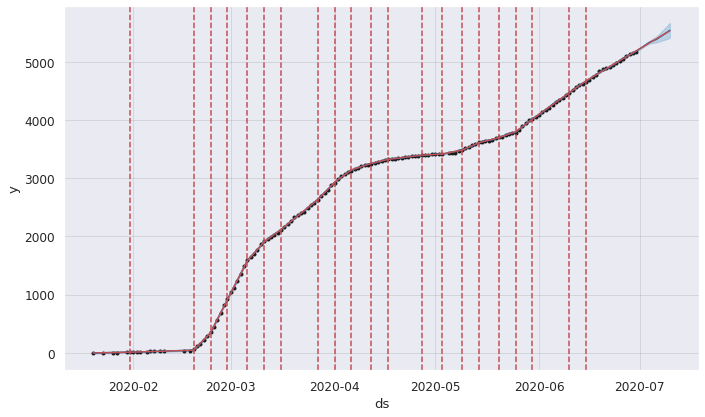

In [ ]:
from fbprophet.plot import add_changepoints_to_plot

fig = prophet.plot(forecast_data)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast_data)

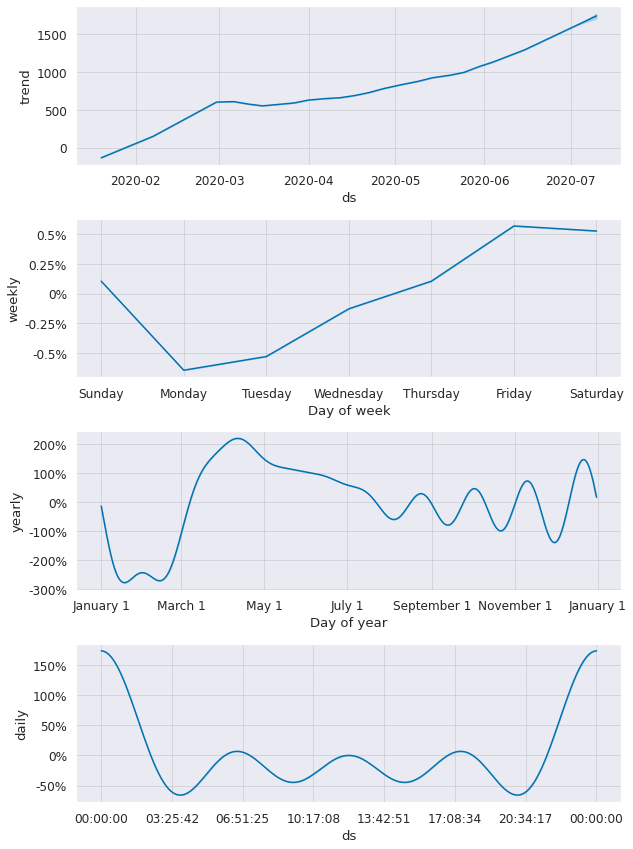

In [ ]:
sns.set(font_scale=1.1)
fig1 = prophet.plot_components(forecast_data)
plt.tight_layout()

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1030 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1997 out of 2000 | elapsed:   36.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   36.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 10],
                         'kernel': ['linear', 'rbf'],
                         'shrinking': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:

from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

confirm_cumsum = confirm.cumsum()
# confirm_cumsum = confirm_cumsum['count'].astype(float).to_frame()
confirm_cumsum.tail()

,patient_id
confirmed_date,
2020-06-26,5044
2020-06-27,5092
2020-06-28,5130
2020-06-29,5155
2020-06-30,5162


In [ ]:
model = ARIMA(confirm_cumsum['patient_id'].values, order=(1, 2, 1))
fit_model = model.fit(trend='c', full_output=True, disp=True)
fit_model.summary()
# 계수들의 p-value 값이 유의수준 0.05보다 작음. AR=1, MA=1, 차분=2로 설정하는 것 유의미하다고 보여짐.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  146
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -606.218
Method:                       css-mle   S.D. of innovations             15.377
Date:                Fri, 04 Dec 2020   AIC                           1220.436
Time:                        18:55:08   BIC                           1232.370
Sample:                             2   HQIC                          1225.285
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1091      0.788      0.139      0.890      -1.435       1.653
ar.L1.D2.y     0.2712      0.186      1.454      0.148      -0.094       0.637
ma.L1.D2.y    -0.5516      0.155     -3.560      0.001      -0.855      -0.248
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.6880           +0.0000j            3.6880            0.0000
MA.1            1.8128           +0.0000j            1.8128            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'Error Variation of Actual and Predicted Values')

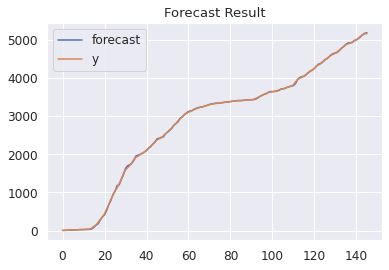

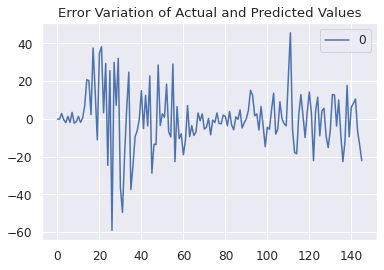

In [ ]:
plt.rc('font', family='Malgun Gothic')
fit_model.plot_predict()
plt.title('Forecast Result')
pd.DataFrame(fit_model.resid).plot()
plt.title('Error Variation of Actual and Predicted Values')

In [ ]:
forcast = fit_model.forecast(steps=6)
pred_y = forcast[0].tolist()
pred_y

[5176.464532876447,
 5193.032623371759,
 5210.250642619758,
 5227.72443903812,
 5245.347138394045,
 5263.089761730835]